# MNIST とは

MNISTは，手書きで書かれた０～９の数字の画像データセットである．  
画素数は28×28の784ピクセル．  
画像データと正解ラベルデータのペアで構成され，それぞれ学習用に42,000個．検証用に28,000個ある  

# EDA

## デフォルトインポート

In [413]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import torch
from torch import nn, optim

warnings.filterwarnings('ignore')

%matplotlib inline

## データ読み込み

In [414]:
df = pd.read_csv('data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [416]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


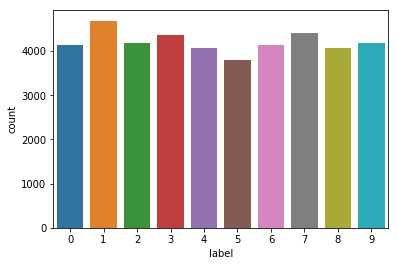

In [431]:
print(df['label'].value_counts())
sns.countplot(df['label'])

# 学習

In [439]:
# Pytorch用にデータ準備
X = df.drop(columns=['label'])
X = np.array(X)
y = df.label
y = np.array(y)
X_train, X_valid, y_train, y_valid = train_test_split(X,
                                                      y,
                                                      train_size=0.8,
                                                      shuffle=True,
                                                      random_state=0)

# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 訓練・検証用
scaler.fit(X_train)
scaler.transform(X_train)
scaler.transform(X_valid)
# 全データ用
scaler.fit(X)
scaler.transform(X)

X_torch_train = torch.tensor(X_train, dtype=torch.float32)
X_torch_valid = torch.tensor(X_valid, dtype=torch.float32)
y_torch_train = torch.tensor(y_train, dtype=int)
y_torch_valid = torch.tensor(y_valid, dtype=int)
X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=int)

In [440]:
# モデル
torch.manual_seed(0)
net = nn.Linear(in_features=784, out_features=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD((net.parameters()), lr=0.005)

num_epochs = 50
loss_list = []

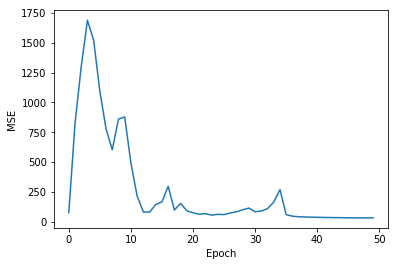

In [441]:
# 学習
for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()

    y_pred = net(X_torch_train)
    loss = criterion(y_pred, y_torch_train)

    # 勾配計算
    loss.backward()
    loss_list.append(loss.item())

    # 更新
    optimizer.step()
    
# 損失の可視化
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [442]:
# 予測確率の確認(トレーニングデータ)
output = net(X_torch_train)
_, labels_pred = torch.max(output, dim=1)
correct_num = (y_torch_train == labels_pred).sum().item()
print(f'Correct: {correct_num}({(correct_num/len(y_torch_train)):.3f})')

Correct: 29887(0.889)


In [443]:
# 予測確率の確認(検証データ)
output = net(X_torch_valid)
_, labels_pred = torch.max(output, dim=1)
correct_num = (y_torch_valid == labels_pred).sum().item()
print(f'Correct: {correct_num}({(correct_num/len(y_torch_valid)):.3f})')

Correct: 7477(0.890)


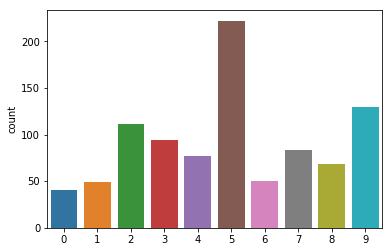

In [445]:
# 不正解のヒストグラム
incorrect = []
for label_pred, label_true in zip(labels_pred, y_torch_valid):
    # print(label_pred.item(), label_true.item())
    if not label_pred.item() == label_true.item():
        incorrect.append(label_true.item())

# 可視化
sns.countplot(incorrect)

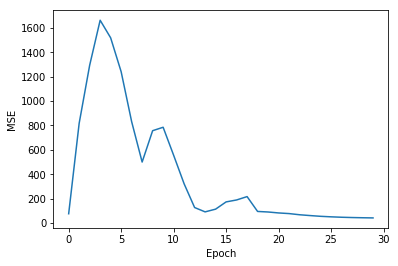

In [512]:
# 再学習モデル
torch.manual_seed(0)
net = nn.Linear(in_features=784, out_features=10)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD((net.parameters()), lr=0.005)
loss_list = []

for epoch in range(1, num_epochs + 1):
    optimizer.zero_grad()

    y_pred = net(X_torch)
    loss = criterion(y_pred, y_torch)

    # 勾配計算
    loss.backward()
    loss_list.append(loss.item())

    # 更新
    optimizer.step()
    
# 損失の可視化
plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

In [513]:
# 予測確率の確認(トレーニングデータ)
output = net(X_torch)
_, labels_pred = torch.max(output, dim=1)
correct_num = (y_torch == labels_pred).sum().item()
print(f'Correct: {correct_num}({(correct_num/len(y_torch)):.3f})')

Correct: 37206(0.886)


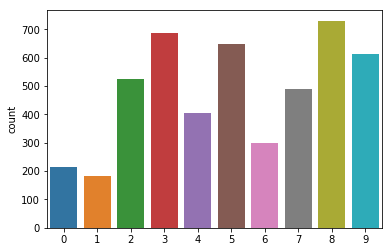

In [514]:
# 不正解のヒストグラム
incorrect = []
for label_pred, label_true in zip(labels_pred, y_torch):
    # print(label_pred.item(), label_true.item())
    if not label_pred.item() == label_true.item():
        incorrect.append(label_true.item())

# 可視化
sns.countplot(incorrect)

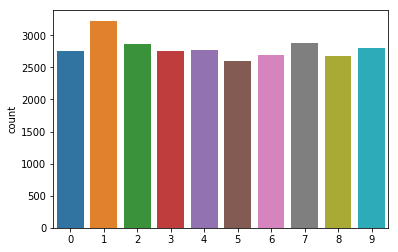

In [515]:
# テストデータの予測
X_test = pd.read_csv('data/test.csv')
X_test = np.array(X_test)
X_torch_test = torch.tensor(torch.from_numpy(X_test), dtype=torch.float32)
y_pred_test = net(X_torch_test)
_, labels_pred = torch.max(y_pred_test, dim=1)
labels = labels_pred.detach().numpy()

# 予測結果のラベルヒストグラム
sns.countplot(labels)

In [516]:
# 保存
sub = pd.read_csv('data/sample_submission.csv')
result = pd.DataFrame({'ImageId': sub['ImageId'],'Label': labels_pred})
result.to_csv('data/submission.csv', index=False)